In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import tools

In [2]:
hdul=fits.open("advact_tt_patch.fits")
mymap=hdul[0].data
hdul.close()
mymap=np.asarray(mymap,dtype='float')
nx,ny = mymap.shape
width=128 # chopping off a big enough part of the map due to save RAM. 

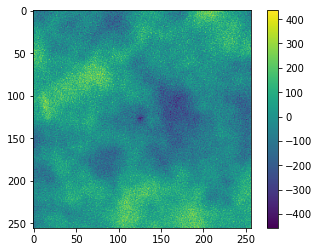

In [3]:
plt.imshow(mymap[nx//2-width:nx//2+width,ny//2-width:ny//2+width],aspect='equal')
plt.colorbar()
patch=mymap[nx//2-width:nx//2+width,ny//2-width:ny//2+width].copy()

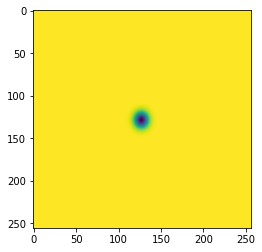

In [4]:
fitp=[-269.05607134,    0.38579781,   -1.32372561,    6.47035581,   -5.68035932]
templ=tools.gauss2d(fitp,128)
plt.imshow(templ,aspect='equal')

In [5]:
res=patch-templ

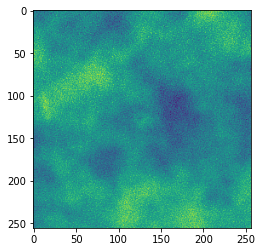

In [6]:
plt.imshow(res,aspect='equal')   # remove an estimate of the signal for better PS estimation

In [11]:
smooth_ps = tools.estimate_ps(res,sig_smooth=10)

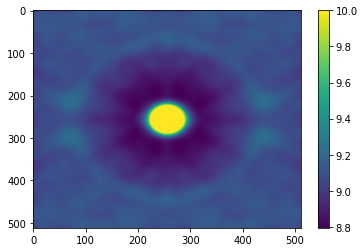

In [12]:
plt.imshow(np.log10(np.fft.fftshift(smooth_ps[:,:])),aspect='auto',vmax=10)
plt.colorbar()

In [13]:
filt_map = tools.apply_Ninv(patch,smooth_ps)

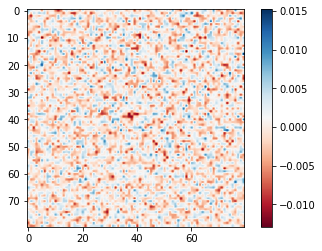

In [24]:
nx,ny=filt_map.shape
width=40
plt.imshow(filt_map[nx//2-width:nx//2+width,ny//2-width:ny//2+width],aspect='equal',cmap='RdBu')
plt.colorbar()

## we can clearly see the signal in the middle, whereas the large scale noise is gone.